In [1]:
#matplotlib inline magic command
%matplotlib inline

#import dependencies
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
#files to load
city_data_to_load = 'Resources/city_data.csv'
ride_data_to_load =  'Resources/ride_data.csv'

In [3]:
#read csv files and store it into a pandas dataframe
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

#city_data_df.head()

###### inspecting city_data_df

In [4]:
#checking if any missing rows
city_data_df.count()

city            120
driver_count    120
type            120
dtype: int64

In [5]:
#checking for any null values
city_data_df.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [6]:
#checking for the data type in each column
city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [7]:
#checking for how many types of data points on the city dataset
city_data_df['type'].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [8]:
#get the number of data points from urban areas
sum(city_data_df['type'] == 'Urban')

66

In [9]:
#get the number of data points from the suburban areas
sum(city_data_df['type']== 'Suburban')

36

In [10]:
#get the number of data points from the rural areas
sum(city_data_df['type']== 'Rural')

18

###### inspecting ride_data_df

In [11]:
#checking for any missing rows
ride_data_df.count()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [12]:
#checking for any null values
ride_data_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [13]:
#checking for different data types per column
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

###### merging ride_data and city_data dataframes

In [14]:
#combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how = 'left', on = ['city', 'city'])


#pyber_data_df.head()

###### creating a bubble chart to showcase the average fare versus the total number of rides based on the average number of drivers for each city type (urban, suburban, rural)

In [15]:
#create a new dataframe for each city type

#urban
urban_cities_df = pyber_data_df[pyber_data_df['type'] == 'Urban']

#suburban
suburban_cities_df = pyber_data_df[pyber_data_df['type'] == 'Suburban']

#rural
rural_cities_df = pyber_data_df[pyber_data_df['type'] == 'Rural']

In [16]:
#get the number of rides for urban cities
urban_ride_count = urban_cities_df.groupby(['city']).count()['ride_id']

#get the number of rides for suburban cities
suburban_ride_count = suburban_cities_df.groupby(['city']).count()['ride_id']

#get the number of rides for the rural cities
rural_ride_count = rural_cities_df.groupby(['city']).count()['ride_id']

In [17]:
#get the average fare for each city in the urban cities
urban_avg_fare = urban_cities_df.groupby(['city']).mean()['fare']

#get the average fare for each city in the suburban cities
suburban_avg_fare = suburban_cities_df.groupby(['city']).mean()['fare']

#get the averahe fare for eacj city in the rural cities
rural_avg_fare = rural_cities_df.groupby(['city']).mean()['fare']


In [18]:
#get the average number of drivers per city in the urban cities
urban_driver_count = urban_cities_df.groupby(['city']).mean()['driver_count']

#get the average number of drivers per city in the suburban cities
suburban_driver_count = suburban_cities_df.groupby(['city']).mean()['driver_count']

#get the average number of drivers per city in the rural cities
rural_driver_count = rural_cities_df.groupby(['city']).mean()['driver_count']

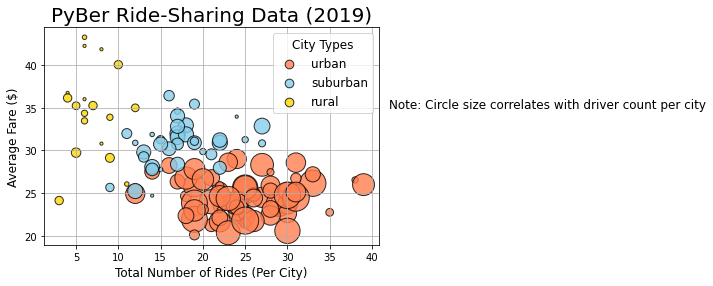

In [22]:
#creating the scatter plot for the urban cities
plt.scatter(x = urban_ride_count,
            y = urban_avg_fare,
            s = 10* urban_driver_count,
            c = 'coral',
            edgecolor = 'black',
            linewidth = 1,
            alpha = 0.8,
            label = 'urban')



#creating the scatter plot for the suburban cities
plt.scatter(x = suburban_ride_count,
            y = suburban_avg_fare,
            s = 10* suburban_driver_count,
            c = 'skyblue',
            edgecolor = 'black',
            linewidth = 1,
            alpha = 0.8,
            label = 'suburban')




#creating the scatter plot for the rural cities
plt.scatter(x = rural_ride_count,
            y = rural_avg_fare,
            s = 10* rural_driver_count,
            c = 'gold',
            edgecolor = 'black',
            linewidth = 1,
            alpha = 0.8,
            label = 'rural')

#Adds appropriate titles for all the graphs
plt.title('PyBer Ride-Sharing Data (2019)', fontsize = 20)
plt.ylabel('Average Fare ($)', fontsize = 12)
plt.xlabel('Total Number of Rides (Per City)', fontsize = 12)
plt.grid(True)


#Adds the legend/label
lgnd = plt.legend(fontsize = 12, mode = 'Expanded', 
                  scatterpoints = 1, loc = 'best', title = 'City Types')


#Use legendHandles[] to set the font size of the marker
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)

#incorporates a text box about the circle size beside the chart where '42 and 35' are x'y coordinates
plt.text(42, 35, 'Note: Circle size correlates with driver count per city', fontsize = 12)

#save the figure
plt.savefig('Analysis/Fig1.png')

#combine and show the plot
plt.show()